# *<font color='Blue'>UFO sightings analysis</font>*

### Libraries used:<br>
**pandas:** Data manipulation for structured data.<br>
**matplotlib.pyplot:** Basic data visualization.<br>
**seaborn:** Enhanced data visualization.<br>
**numpy:** Numeric and mathematical operations.<br>
**datetime:** Date and time handling.<br>
**reverse_geocoder:** Convert coordinates to locations.<br>
**pprint:** Pretty-print complex data structures.<br>
**WordCloud:** Create word clouds from text data.<br>

### Dataset Source:<br>
https://www.kaggle.com/datasets/jonwright13/ufo-sightings-around-the-world-better/

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import reverse_geocoder as rg
import pprint
from wordcloud import WordCloud

In [234]:
ufo_data=pd.read_csv('ufo-sightings-transformed.csv')
ufo_data.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,10/10/1949 20:30,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,10/10/1949 21:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,10/10/1955 17:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,10/10/1956 21:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,10/10/1960 20:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


# **<font color='red'>Data Exploration</font>**

## <font color='blue'>.info() function </font><br>
The <font color='blue'>.info()</font> function will let us know our data types, and if we have any missing data. <br>
In our case:<br>1- We have missing values that we'll deal with it later.<br>2- We have to convert the attributes 'Date_time' and 'date_documented' to a datetime format.<br>

In [235]:
ufo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80328 entries, 0 to 80327
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    80328 non-null  object 
 1   date_documented              80328 non-null  object 
 2   Year                         80328 non-null  int64  
 3   Month                        80328 non-null  int64  
 4   Hour                         80328 non-null  int64  
 5   Season                       80328 non-null  object 
 6   Country_Code                 80069 non-null  object 
 7   Country                      80069 non-null  object 
 8   Region                       79762 non-null  object 
 9   Locale                       79871 non-null  object 
 10  latitude                     80328 non-null  float64
 11  longitude                    80328 non-null  float64
 12  UFO_shape                    78398 non-null  object 
 13  length_of_encoun

## <font color='blue'>.describe() function</font> <br>
The <font color='blue'>.describe()</font> function provides a summary of basic statistical measures for the numerical attributes that can help us get a quick understanding of the distribution and central tendencies of our data.

In [236]:
ufo_data.describe()

,Year,Month,Hour,latitude,longitude,length_of_encounter_seconds
count,80328.000000,80328.000000,80328.000000,80328.000000,80328.000000,8.032800e+04
mean,2003.850463,6.835026,15.525172,38.124963,-86.772015,9.017336e+03
std,10.426547,3.234876,7.753750,10.469146,39.697805,6.202322e+05
min,1906.000000,1.000000,0.000000,-82.862752,-176.658056,1.000000e-03
25%,2001.000000,4.000000,10.000000,34.134722,-112.073333,3.000000e+01
50%,2006.000000,7.000000,19.000000,39.412500,-87.903611,1.800000e+02
75%,2011.000000,9.000000,21.000000,42.788333,-78.755000,6.000000e+02
max,2014.000000,12.000000,23.000000,72.700000,178.441900,9.783600e+07


# **<font color='red'>Data cleaning</font>**

In our case we have 6 columns that contain missing values:<br><br>
4 of them are geospatial data: 'Country_Code', 'Country', 'Region', 'Locale'.<br>
And 2 are nominal: 'UFO_shape' and 'Description'

In [237]:
# .isnull() is a function that returns true when we have a missing value.
ufo_data.isnull().sum()

Date_time                         0
date_documented                   0
Year                              0
Month                             0
Hour                              0
Season                            0
Country_Code                    259
Country                         259
Region                          566
Locale                          457
latitude                          0
longitude                         0
UFO_shape                      1930
length_of_encounter_seconds       0
Encounter_Duration                0
Description                      15
dtype: int64

### Calculating the proportion of missing values in the whole dataset

In [238]:
missing_values = ufo_data.isnull().sum()
total_rows = len(ufo_data)
proportion_missing = missing_values / total_rows
print(proportion_missing)

Date_time                      0.000000
date_documented                0.000000
Year                           0.000000
Month                          0.000000
Hour                           0.000000
Season                         0.000000
Country_Code                   0.003224
Country                        0.003224
Region                         0.007046
Locale                         0.005689
latitude                       0.000000
longitude                      0.000000
UFO_shape                      0.024026
length_of_encounter_seconds    0.000000
Encounter_Duration             0.000000
Description                    0.000187
dtype: float64


### **Dealing with missed geospatial data:**<br>
Since we have a really large dataset (80 328 rows), we might encounter several problems while dealing with missed data:<br><br>1) Data Inaccuracy.<br>2) Inconsistent Data.<br>3) Data Entry Errors.<br>Correcting and cleaning data with inaccuracies or inconsistencies can be time consuming.<br><br>Example: We might have as a country: USA, as a region:Texas and as a Locale: Zahle which is 1000% inaccurate. 

### **How can we prevent these limitations? Reverse geocoding:<br>**
Reverse geocoding is the process of finding a place or a location address from a given pair of geographic coordinates: latitude and longitude.<br><br>Benefits<br>1) It ensures that your location info is correct and standardized, reducing errors.<br>2) It can help fill in missing or incomplete information for rows with missing country codes or other location attributes.

### Sampling the dataset:<br><br>
Unfortunetly since our dataset is really large (80328 rows), applying this method can be time-consuming, especially if each row requires an individual API request.<br><br>There exist more advanced methods to get rid of this problem like:<br>1) Batch Processing: We can group multiple coordinates into a batch and send fewer requests.<br>2) Parallel Processing: The use of multiple CPU cores to process multiple rows concurrently.<br>and other...<br><br>In my case, I sampled the data into 100 rows just to show that reverse geocoding can really help by getting rid of missing, inaccurate and inconsistent data.

In [239]:
# sampling the data
sample_data=ufo_data.iloc[0:100]

In [240]:
# Writing the reverse geocoding function:
def reverseGeocode(coordinates):
    result=rg.search(coordinates)
    return result[0]

In [241]:
for index, row in sample_data.iterrows(): #looping through the dataset
    coordinates = (row['latitude'], row['longitude']) # a tuple contaning the coordinates
    result = reverseGeocode(coordinates) #searching the coordinates.
    
    # Updating the dataset with the right attributes
    sample_data.at[index, 'Country_Code'] = result['cc']
    sample_data.at[index, 'Region'] = result['admin1']
    sample_data.at[index, 'Locale'] = result['name']

Since the proportion of missing values in the dataset is low, we can simply drop the rows with missing values in the geospatial attributes:

In [242]:
# getting rid of missing values in those three attributes:
ufo_data.dropna(subset=['Country_Code', 'Region', 'Locale'], inplace=True)

In [243]:
# Getting rid of the column Country since we already have Country_Code:
ufo_data.drop(columns=['Country'], inplace=True)

### Cleaning UFO_shape:<br>
One of the ways that we can handle missing nominal data is by replacing the missing value by the mode of the attribute<br><br>
**Note:** We have to make sure that we don't have highly skewed class distributions.
In some cases, this method can make the data imbalanced if there are a huge number of missing values in our dataset.


### How can we know if the skewness will be affected or not?<br>
We can either plot a bar plot or pie chart since both can be indicators of skewness.

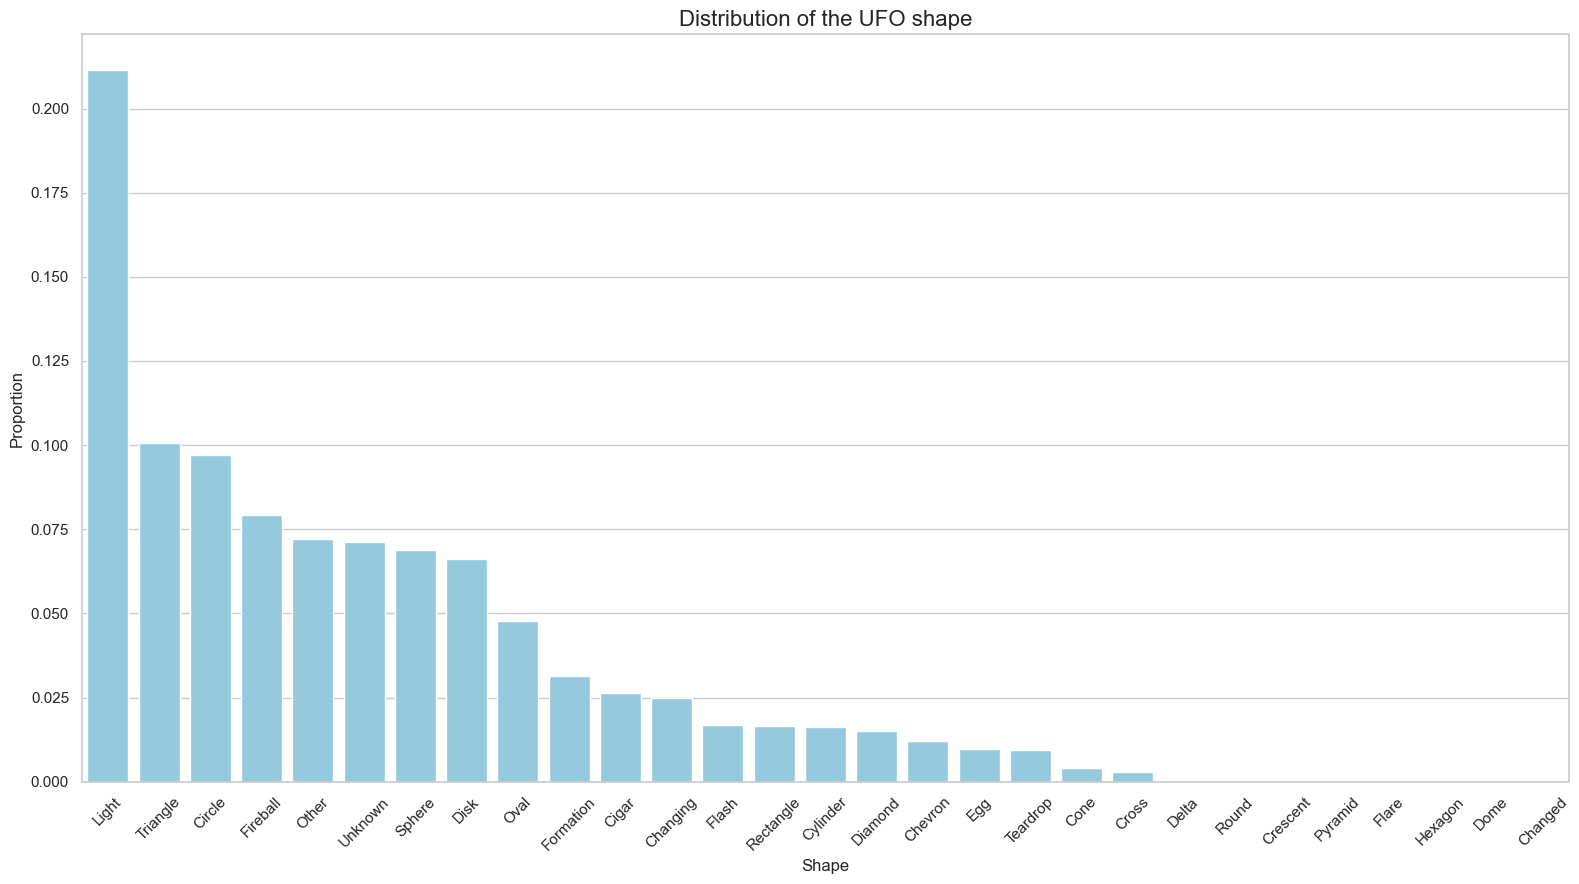

In [244]:
"""
 1) The .value_counts fucntion will give us the frequency
    of each category in the Country_code Column

 2) The parameter normalize is set to True to return the
    proportions of each category.
"""
Shapes_nb=ufo_data['UFO_shape'].value_counts(normalize=True)
sns.set(style="whitegrid") # This style is used to have a white  background with grid lines.
plt.figure(figsize=(16,9)) #chose this size because PowerPoint presentations are displayed in a 16:9 widescreen format.
sns.barplot(x=Shapes_nb.index,y=Shapes_nb.values, color="Skyblue") 
plt.title('Distribution of the UFO shape',fontsize=16)
plt.xlabel('Shape', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45) # rotating the x-axis labels for better readability
plt.tight_layout() # Fitting the plot within the figure 
plt.show()

The light shape covers 20% of the 'UFO_shape' attribute<br>
In our case, since we only have 2.4% of missing values in our dataset, filling them in with the mode won't affect the UFO shape distribution<br>
In other future case, it might not work this way and it may be an invalid choice for us.

In [245]:
# replacing missing values with the mode:
ufo_data['UFO_shape'].fillna(ufo_data['UFO_shape'].mode()[0], inplace=True)
# the [0] is used to extract the first mode from the serie.

For the Description Column, each description is unique.<br>
So we will get rid of rows with missing descriprion.

In [246]:
ufo_data.dropna(subset=['Description'], inplace=True)

### Getting rid of Outliers in the 'length_of_encounter_seconds':
Since later on in our analysis we're gonna use this column, let's het rid or its outliers:

In [247]:
# The first quartile:
Q1 = ufo_data['length_of_encounter_seconds'].quantile(0.25)
# The third quartile:
Q3 = ufo_data['length_of_encounter_seconds'].quantile(0.75)

# Calculating the IQR:
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing the outliers:
ufo_data = ufo_data[(ufo_data['length_of_encounter_seconds'] >= lower_bound) & (ufo_data['length_of_encounter_seconds'] <=upper_bound )]

### Converting 'Date_time' and 'date_documented' into datetime format:

In [248]:
#errors='coerce', will convert unparseable values to NaN:
ufo_data['Date_time'] = pd.to_datetime(ufo_data['Date_time'], format='%m/%d/%Y %H:%M', errors='coerce')
ufo_data['date_documented'] = pd.to_datetime(ufo_data['date_documented'],format='%m/%d/%Y',errors='coerce')

# **<font color='red'>Time Series Analysis</font>** <br>
### Is there a long term trend in UFO sightings over the years? Are there any seasonality or peaks in specific years?

In [249]:
# First of all we should aggregate the data by year to have yearly counts of UFO sightings
# .value_counts() will count each category in a certain attribute
# .sort_index() will sort the years (since the year is the index and the values is frequency of each year)
yearly_counts=ufo_data['Year'].value_counts().sort_index()
yearly_counts

Year
1910       2
1916       1
1920       1
1925       1
1929       1
        ... 
2010    3689
2011    4482
2012    6484
2013    6186
2014    1992
Name: count, Length: 85, dtype: int64

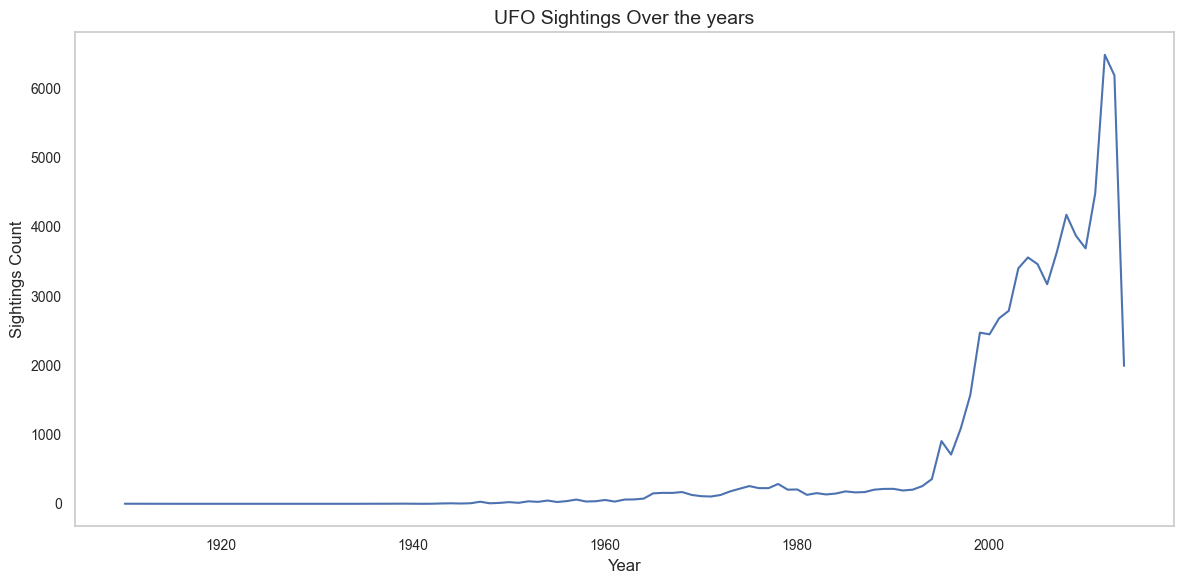

In [250]:
# Creating a line plot:
yearly_counts.plot(kind='line',figsize=(12,6))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sightings Count',fontsize=12)
plt.title('UFO Sightings Over the years',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)  
plt.tight_layout()  
plt.show()

### Interpretation:<br>
We can clearly see that from year 1920 till 2000 the UFO sightings are constant with barely any change.<br>

To have a clearer view of the trend from year 2000 till 2014, we're gonna filter the dataset for only years>=2000:

In [251]:
# Filtering the data:
filtered_df = ufo_data[ufo_data['Year'] >= 2000]
filtered_df.shape

(56015, 15)

In [252]:
# aggregating the data by years:
yearly_counts=filtered_df['Year'].value_counts().sort_index()

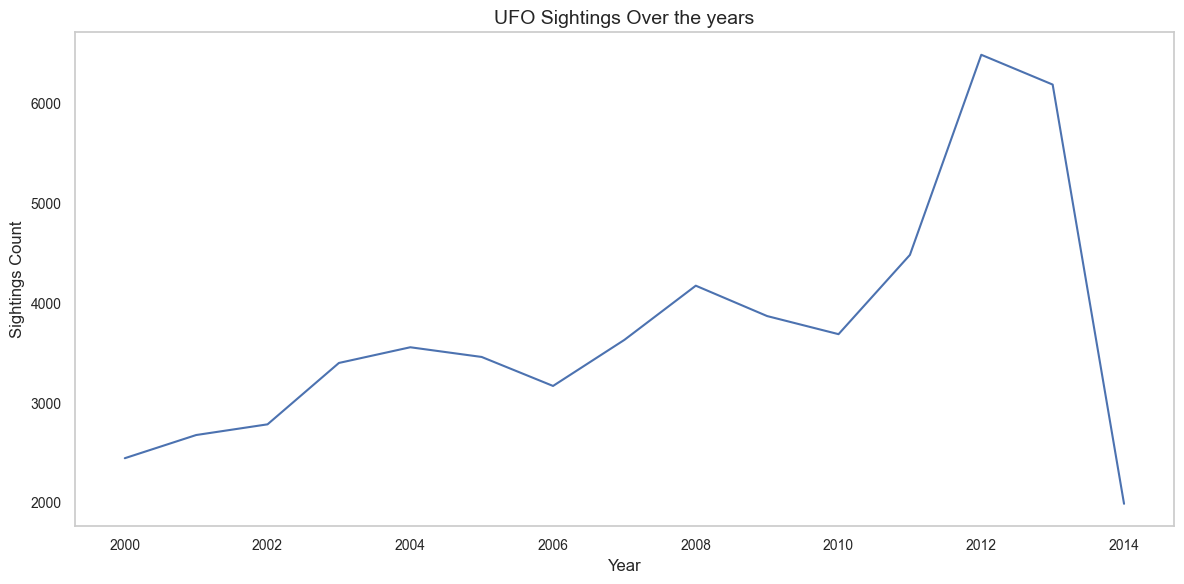

In [253]:
# Creating a line plot:
yearly_counts.plot(kind='line',figsize=(12,6))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sightings Count',fontsize=12)
plt.title('UFO Sightings Over the years',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False) 
plt.tight_layout() 
plt.show()

### Interpretation:<br>
This is a cyclical time series plot because it shows a consistent pattern of peaks and troughs, occuring at regular two-year intervals.<br>Each two years, there is a trough, followed by a peak in the next two years, and this cycle repeats.<br>Therefore, this time series shows a clear biennial trend.

# **<font color='red'>Geospatial Analysis</font>**<br>
### Can we identify any geographic clusters or regions with higher UFO sighting frequencies?

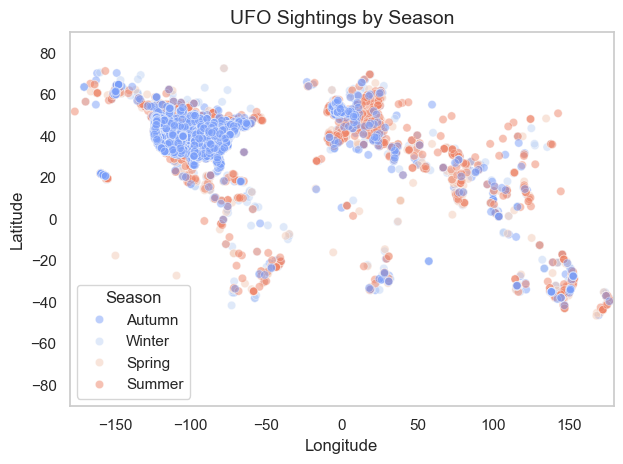

In [254]:
# hue represents the attribute that we want it to represent the color
sns.scatterplot(x='longitude', y='latitude', data=ufo_data, hue='Season', palette='coolwarm', alpha=0.5)
plt.title('UFO Sightings by Season', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
# Customize the legend
plt.legend(title='Season', loc='best')
plt.grid(False)
# we are setting the limits of the x-axis to a range from -180 t0 180,
# which corresponds to the valid longitude values on earth
plt.xlim(-180, 180) 
# Setting the appropriate latitude limits 
plt.ylim(-90, 90) 
plt.tight_layout()  
plt.show()
plt.show()

### Interpretation:<br>
The map shows a significant number of UFO sightings in areas like USA and Europe.<br>
This observation poses the question of whether the residents are more prone to report sightings or if there is a higher frequency of UFO activity there?<br>
To determine the reasons behind this regional grouping of UFO reports, more research should be done.<br>
The sightings of UFO happen mostly during the summer and autumn.<br>
We can barely see any sightings during other seasons.<br>

# **<font color='red'>Bar chart for most common UFO shapes:</font>** <br>

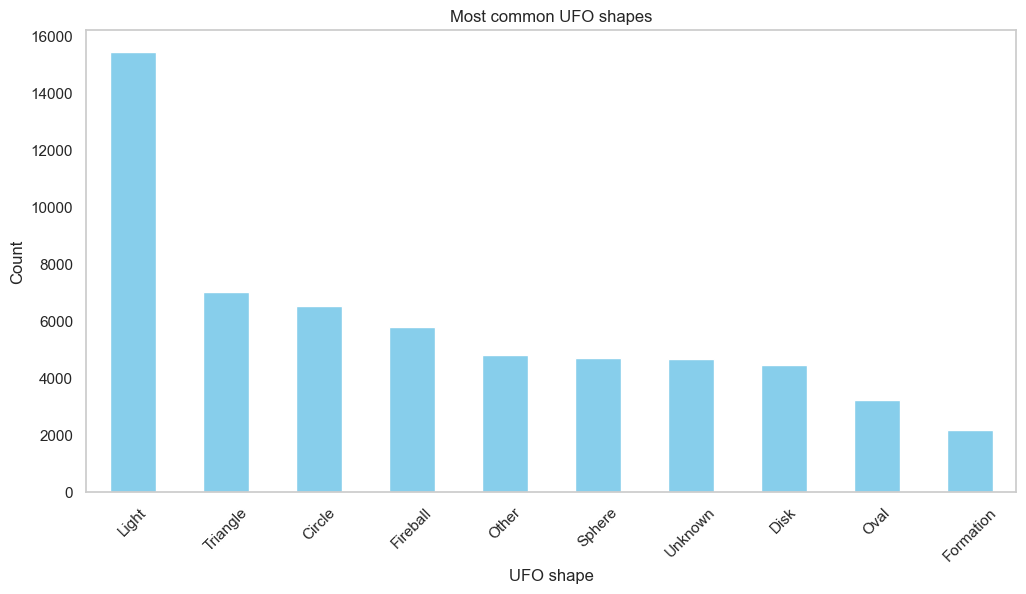

In [255]:
shape_counts=ufo_data['UFO_shape'].value_counts()
shape_counts=shape_counts.head(10)
plt.figure(figsize=(12,6))
shape_counts.plot(kind='bar',color='skyblue')
plt.title('Most common UFO shapes')
plt.xlabel('UFO shape')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

### Interpretation:<br>
The most seen UFO shape is light, which indicates the UFO's light.

# **<font color='red'>Average encounter duration by UFO shape:**<br>

In [256]:
# Group by 'UFO_shape' and calculating the meanof the encounter duration.
grouped_data = ufo_data.groupby('UFO_shape')['length_of_encounter_seconds'].mean().reset_index()

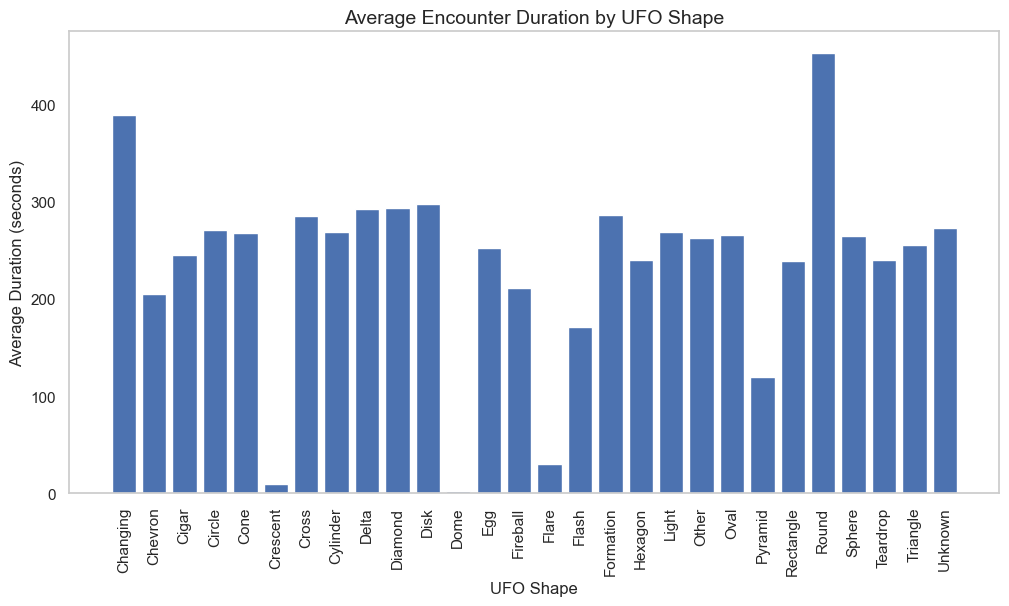

In [257]:
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['UFO_shape'], grouped_data['length_of_encounter_seconds'])
plt.xticks(rotation=90)
plt.xlabel('UFO Shape', fontsize=12)
plt.ylabel('Average Duration (seconds)', fontsize=12)
plt.title('Average Encounter Duration by UFO Shape', fontsize=14)
plt.grid(False)
plt.show()

### Interpretation:<br>
The distribution of the encounter duration is well balanced.<br>
Round is the UFO shape that shows the longest.

# **<font color='red'>Word Cloud</font>**<br>
What are the most commonly used words in UFO sightings descriptions?<br>
Do any specific terms stand out as recurring themes or patterns?

In [258]:
# Combining all descriptions from the dataset into a sttring.
all_desc=' '.join(ufo_data['Description'].dropna())

In [259]:
# Customizing the word cloud:
wordcloud=WordCloud(
    background_color='white',
    width=800, height=400, #width and height of the image
    colormap='viridis', #choosing a color map
    max_words=100, #max words shown is 100
)
# Generating the wordcloud by taking the combined desc:
wordcloud.generate(all_desc)

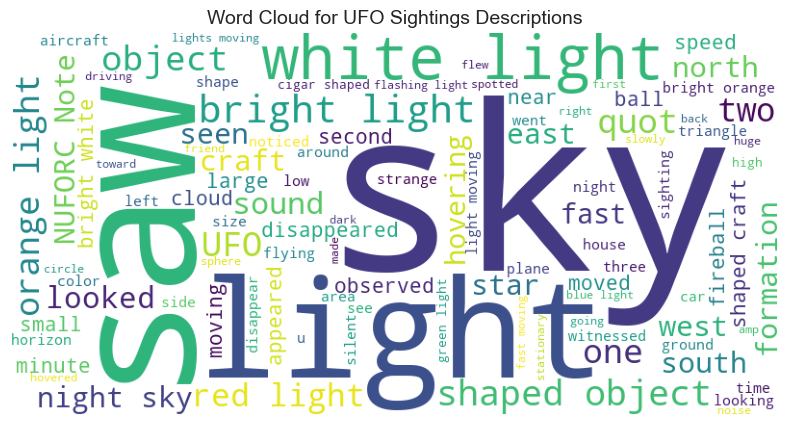

In [260]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud) #this is a function used to display images, in our case its wordcloud
plt.axis('off') # we dont want y-axis and x-axis
plt.title('Word Cloud for UFO Sightings Descriptions', fontsize=14)
plt.show()


### Interpretation:<br>
In the word cloud, we noticed that the word 'light' appears most frequently, it confirms our earlier findings, where 'Light' was the most reported UFO shape.<br> Other common words like 'sky,' 'saw,' 'shaped object,' 'bright,' and 'fireball' provide insights into what people were describing in their UFO sightings.<br> For future analysis, we can explore the emotions or sentiments expressed in these descriptions, which might reveal how people felt during these sightings